In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [165]:
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


DATA CLEANING

In [166]:
# Naming the Columns
df.columns=['id','entity','sentiment','content']
df.head()

,id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [167]:
# #Dataset Overview and Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [168]:
df.shape

(74681, 4)

In [169]:
# Identify Duplicate Rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Length: 74681, dtype: bool

In [170]:
# Identify Missing Data 
df.isnull().sum() 

id             0
entity         0
sentiment      0
content      686
dtype: int64

In [171]:
# Dropping Missing Data 
df.dropna(inplace=True)

In [172]:
df.shape

(73995, 4)

In [173]:
# Check the data types of the columns
df.dtypes

id            int64
entity       object
sentiment    object
content      object
dtype: object

In [174]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [175]:
# Remove Punctuation Marks from the Content Column
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
5
df['content'] = df['content'].apply(remove_punctuation)

In [176]:
# Remove Stop Words from the Content Column
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['content'] = df['content'].apply(remove_stopwords)

In [177]:
# Convert to lowercase
df['content'] = df['content'].str.lower()

In [178]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a text
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    return ' '.join(lemmatized_tokens)  # Join tokens back into a single string

# Apply lemmatization to the Content Column
df['Lemmatized_Text'] = df['content'].apply(lemmatize_text)

In [179]:
# Save the cleaned dataset
df.to_csv('cleaned_twitter_training.csv', index=False)

In [180]:
df = pd.read_csv('cleaned_twitter_training.csv')
df.head()

,id,entity,sentiment,content,Lemmatized_Text
0,2401,Borderlands,Positive,coming borders kill,coming border kill
1,2401,Borderlands,Positive,im getting borderlands kill,im getting borderland kill
2,2401,Borderlands,Positive,im coming borderlands murder,im coming borderland murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder,im getting borderland 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder,im getting borderland murder


DATA VISUALIZATION

C:\Users\rohan\AppData\Local\Temp\ipykernel_11392\3085402307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


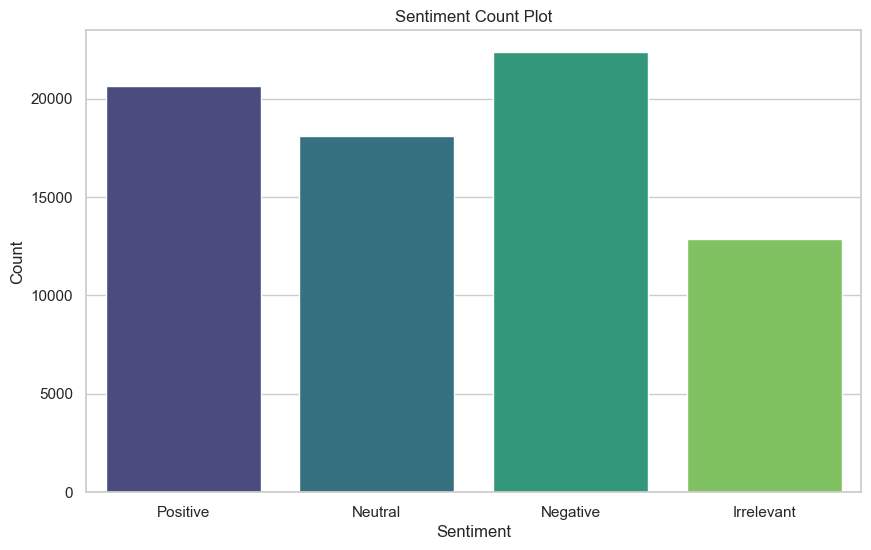

In [181]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')

# Add titles and labels
plt.title('Sentiment Count Plot')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

In [182]:
df_positive = df[df['sentiment'] == 'Positive']
df_negative = df[df['sentiment'] == 'Negative']
df_neutral = df[df['sentiment'] == 'Neutral']
df_irrelevant = df[df['sentiment'] == 'Irrelevant']

In [183]:
# Function to convert values to string and generate word cloud
def generate_wordcloud(text_data, title):
    text_data = text_data.astype(str)  # Convert values to strings
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(' '.join(text_data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

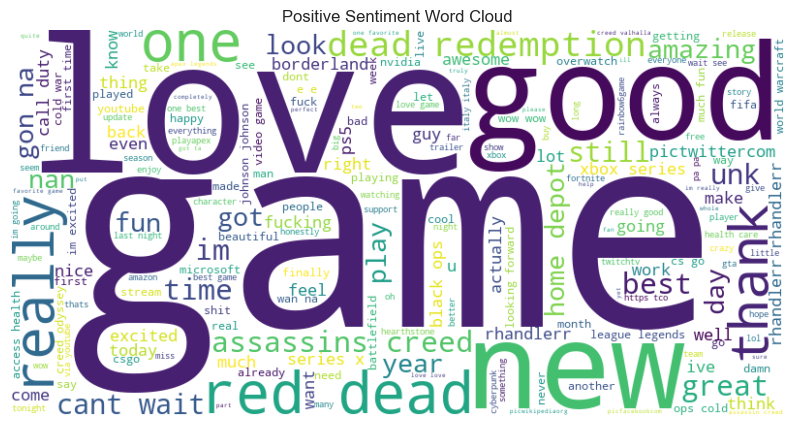

In [184]:
generate_wordcloud(df_positive['content'], 'Positive Sentiment Word Cloud')

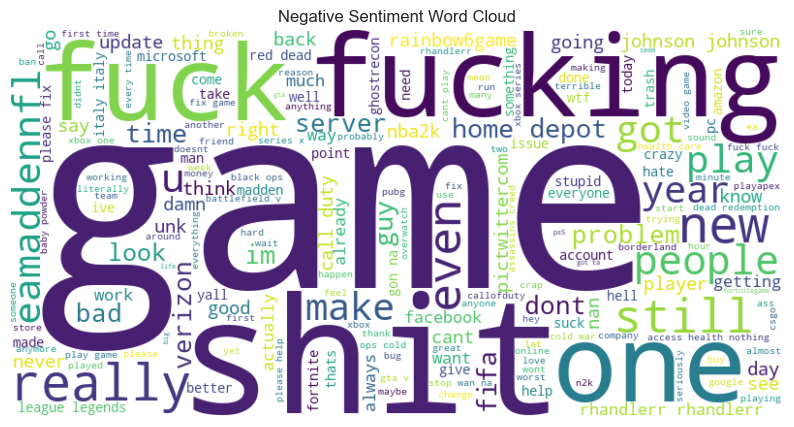

In [185]:
generate_wordcloud(df_negative['content'], 'Negative Sentiment Word Cloud')

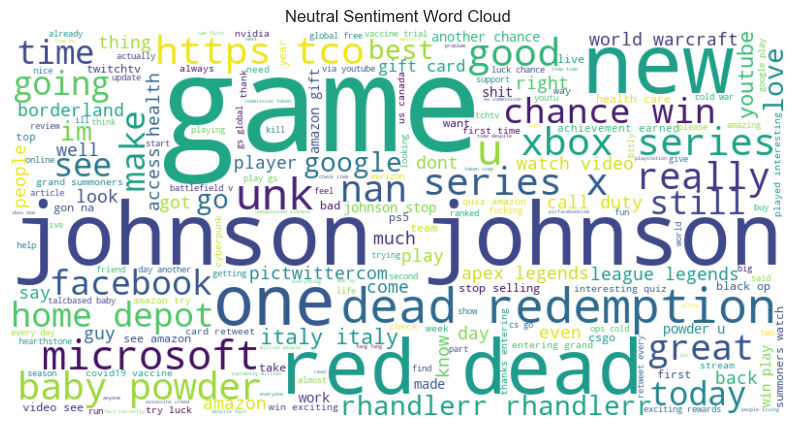

In [186]:
generate_wordcloud(df_neutral['content'], 'Neutral Sentiment Word Cloud')

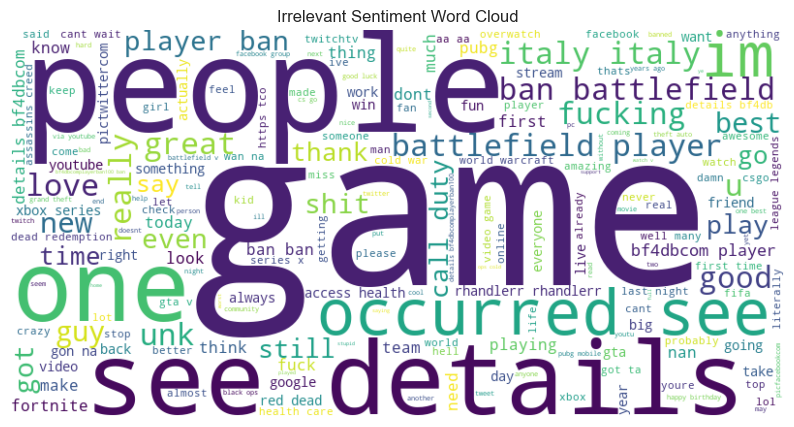

In [187]:
generate_wordcloud(df_irrelevant['content'], 'Irrelevant Sentiment Word Cloud')

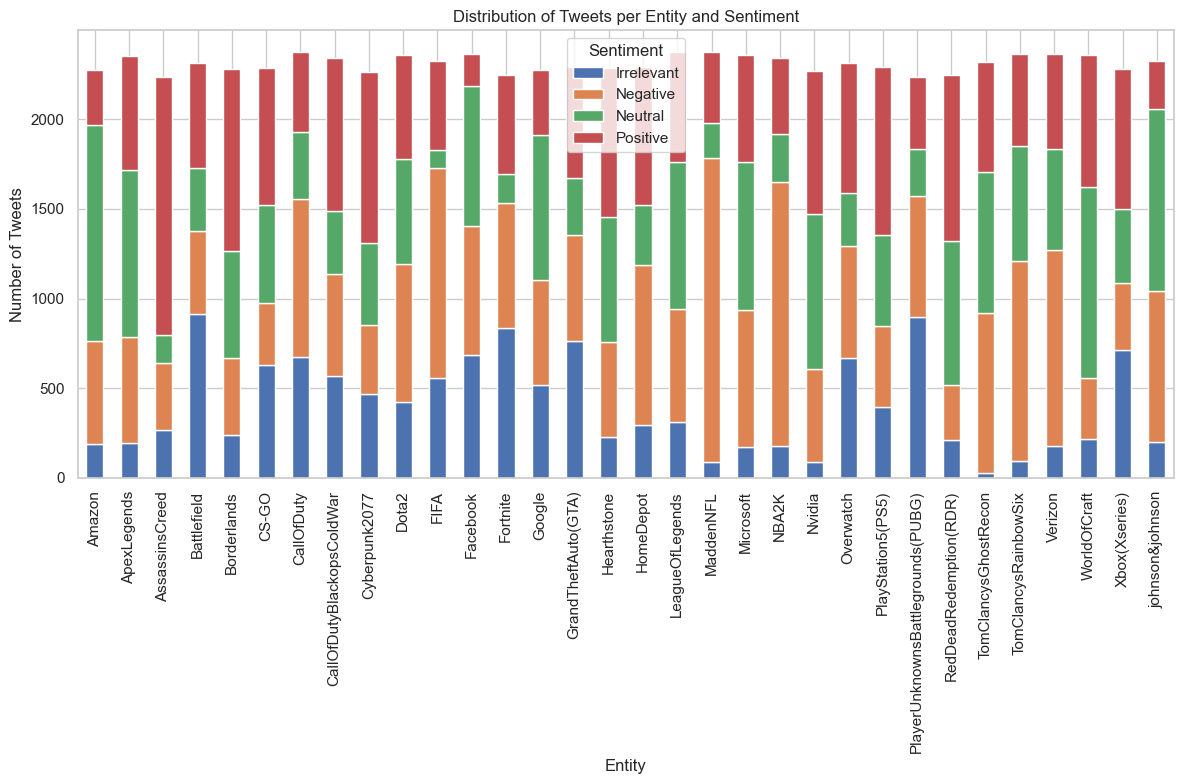

In [188]:
# Group by entity and sentiment to count tweets
tweets_distribution = df.groupby(['entity', 'sentiment']).size().reset_index(name='count')

# Pivot the dataframe for better visualization
pivot_df = tweets_distribution.pivot(index='entity', columns='sentiment', values='count').fillna(0)

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Tweets per Entity and Sentiment')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Logistic Regression 

In [265]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import string


In [266]:
# Load the dataset
df = pd.read_csv('cleaned_twitter_training.csv')
df.head()


,id,entity,sentiment,content,Lemmatized_Text
0,2401,Borderlands,Positive,coming borders kill,coming border kill
1,2401,Borderlands,Positive,im getting borderlands kill,im getting borderland kill
2,2401,Borderlands,Positive,im coming borderlands murder,im coming borderland murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder,im getting borderland 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder,im getting borderland murder


In [268]:
# Data Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [269]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        text = ''
    return text

df['cleaned_content'] = df['content'].apply(preprocess_text)

In [270]:
# Ensure there are no NaN values in 'sentiment'
df = df.dropna(subset=['sentiment'])

# Encode target labels
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

# Ensure there are no NaN values in 'sentiment' after mapping
df = df.dropna(subset=['sentiment'])

In [271]:
# Remove rows with empty 'cleaned_content'
df = df[df['cleaned_content'].str.strip() != '']

# Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['cleaned_content'])
y = df['sentiment']

In [272]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Grid Search for Hyperparameter Tuning
parameters = {'C': [0.1, 1, 10]}
log_reg = LogisticRegression(max_iter=1000, random_state=42)
clf = GridSearchCV(log_reg, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10]})

In [273]:
# Best parameters found by GridSearch
print("Best parameters:", clf.best_params_)

# Model Prediction
y_pred = clf.predict(X_test)

Best parameters: {'C': 10}


In [274]:
# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.854180602006689
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4381
         1.0       0.85      0.86      0.86      4079
         2.0       0.83      0.81      0.82      3500

    accuracy                           0.85     11960
   macro avg       0.85      0.85      0.85     11960
weighted avg       0.85      0.85      0.85     11960



Naive Bayes

In [294]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
# Load the dataset
df = pd.read_csv('cleaned_twitter_training.csv')
df.head()

,id,entity,sentiment,content,Lemmatized_Text
0,2401,Borderlands,Positive,coming borders kill,coming border kill
1,2401,Borderlands,Positive,im getting borderlands kill,im getting borderland kill
2,2401,Borderlands,Positive,im coming borderlands murder,im coming borderland murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder,im getting borderland 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder,im getting borderland murder


In [296]:
# Data preprocessing
df = df.dropna(subset=['content'])  # Drop rows with NaN in 'content' column
X = df['content'].astype(str)  # Convert 'content' to string type
y = df['sentiment']

# Lowercase conversion and tokenization using bi-grams
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.8, min_df=2)
X_vect = vectorizer.fit_transform(X)


In [297]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

In [298]:
# Training the Naive Bayes classifier with grid search for parameter tuning
nb_classifier = MultinomialNB()
parameters = {'alpha': [0.1, 0.5, 1.0, 2.0]}
clf = GridSearchCV(nb_classifier, parameters)
clf.fit(X_train, y_train)
best_alpha = clf.best_params_['alpha']

In [299]:
# Predictions
y_pred = clf.predict(X_test)

In [300]:
# Evaluation
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.91      0.94      2509
    Negative       0.94      0.96      0.95      4489
     Neutral       0.95      0.94      0.94      3402
    Positive       0.93      0.95      0.94      4088

    accuracy                           0.94     14488
   macro avg       0.95      0.94      0.94     14488
weighted avg       0.94      0.94      0.94     14488

Confusion Matrix:
[[2295   74   37  103]
 [  34 4306   60   89]
 [  15   86 3190  111]
 [  19  109   77 3883]]


In [301]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


Random Forest 

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Load the dataset
df = pd.read_csv('cleaned_twitter_training.csv')
df.head()

,id,entity,sentiment,content,Lemmatized_Text
0,2401,Borderlands,Positive,coming borders kill,coming border kill
1,2401,Borderlands,Positive,im getting borderlands kill,im getting borderland kill
2,2401,Borderlands,Positive,im coming borderlands murder,im coming borderland murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder,im getting borderland 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder,im getting borderland murder


In [5]:
# Handle missing values
df['content'] = df['content'].fillna('')  # Replace NaN values with empty string

In [6]:
# Data preprocessing
# Lowercase text and remove punctuation
df['content'] = df['content'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Tokenization
df['content'] = df['content'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['content'] = df['content'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['content'] = df['content'].apply(lambda x: [stemmer.stem(word) for word in x])

# Convert tokens back to string
df['content'] = df['content'].apply(lambda x: ' '.join(x))

In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(df['content'])
y = df['sentiment']

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

  Irrelevant       0.89      0.76      0.82      2624
    Negative       0.89      0.86      0.87      4463
     Neutral       0.86      0.83      0.85      3589
    Positive       0.78      0.90      0.83      4123

    accuracy                           0.85     14799
   macro avg       0.86      0.84      0.84     14799
weighted avg       0.85      0.85      0.85     14799



Support Vector Machine 

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [3]:
# Load the dataset
df = pd.read_csv('cleaned_twitter_training.csv')
df.head()

,id,entity,sentiment,content,Lemmatized_Text
0,2401,Borderlands,Positive,coming borders kill,coming border kill
1,2401,Borderlands,Positive,im getting borderlands kill,im getting borderland kill
2,2401,Borderlands,Positive,im coming borderlands murder,im coming borderland murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder,im getting borderland 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder,im getting borderland murder


In [4]:
# Handle missing values
df['content'] = df['content'].fillna('')  # Replace NaN values with empty string

In [6]:
# Preprocessing function
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', str(text))  # Convert to string before processing
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the content column
df['clean_content'] = df['content'].apply(preprocess_text)

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_content'], df['sentiment'], test_size=0.25, random_state=42)

In [8]:
5# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  

# Fit and transform the training set, transform the test set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

In [10]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train_tfidf, y_train)


In [ ]:
# Print best parameters and best score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [ ]:
# Predict using best estimator from GridSearchCV
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))